# After data generation


In [12]:
import pandas as pd

# Load the dataset you just generated
df = pd.read_csv('D:\\@project\\extracted_features.csv')  # Replace with the actual filename




In [13]:
# Basic Info
print("Shape of the dataset:", df.shape)

Shape of the dataset: (11430, 38)


In [14]:
print(df.head())

   length_url  length_hostname  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19        3           0      0      0       0   
1          77               23        1           0      0      0       0   
2         126               50        4           1      0      1       2   
3          18               11        2           0      0      0       0   
4          55               15        2           2      0      0       0   

   nb_or  nb_eq  nb_underscore  ...  port  tld_in_path  tld_in_subdomain  \
0      0      0              0  ...     0            0                 0   
1      0      0              0  ...     0            0                 0   
2      0      3              2  ...     0            0                 0   
3      0      0              0  ...     0            0                 0   
4      0      0              0  ...     0            0                 0   

   abnormal_subdomain  nb_subdomains  prefix_suffix  random_domain  \
0         

In [15]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
length_url               0
length_hostname          0
nb_dots                  0
nb_hyphens               0
nb_at                    0
nb_qm                    0
nb_and                   0
nb_or                    0
nb_eq                    0
nb_underscore            0
nb_tilde                 0
nb_percent               0
nb_slash                 0
nb_star                  0
nb_colon                 0
nb_comma                 0
nb_semicolumn            0
nb_dollar                0
nb_space                 0
nb_www                   0
nb_com                   0
nb_dslash                0
http_in_path             0
https_token              0
has_ip                   0
ratio_digits_url         0
ratio_digits_host        0
punycode                 0
port                     0
tld_in_path              0
tld_in_subdomain         0
abnormal_subdomain       0
nb_subdomains            0
prefix_suffix            0
random_domain            0
shortening_service       0


Shape of dataset: (11430, 38)

Missing values:
 length_url               0
length_hostname          0
nb_dots                  0
nb_hyphens               0
nb_at                    0
nb_qm                    0
nb_and                   0
nb_or                    0
nb_eq                    0
nb_underscore            0
nb_tilde                 0
nb_percent               0
nb_slash                 0
nb_star                  0
nb_colon                 0
nb_comma                 0
nb_semicolumn            0
nb_dollar                0
nb_space                 0
nb_www                   0
nb_com                   0
nb_dslash                0
http_in_path             0
https_token              0
has_ip                   0
ratio_digits_url         0
ratio_digits_host        0
punycode                 0
port                     0
tld_in_path              0
tld_in_subdomain         0
abnormal_subdomain       0
nb_subdomains            0
prefix_suffix            0
random_domain            0
shorten

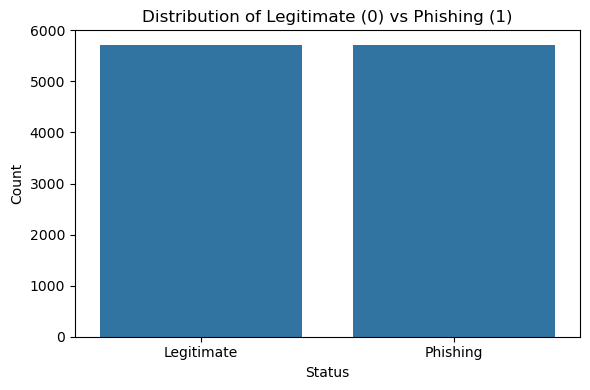

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Basic overview
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['status'].value_counts())

# Plot class balance
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df)
plt.title("Distribution of Legitimate (0) vs Phishing (1)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.tight_layout()
plt.show()



In [17]:
print(df['status'].value_counts())
print(df['status'].unique())


status
legitimate    5715
phishing      5715
Name: count, dtype: int64
['legitimate' 'phishing']


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])  # 'legitimate' → 0, 'phishing' → 1


In [30]:
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score

# # Load the already extracted features
# df = pd.read_csv("extracted_features.csv")  # Contains features + 'status' column

# # Split features and target
# X = df.drop('status', axis=1)
# y = df['status']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train XGBoost model
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Split features and target
X = df.drop('status', axis=1)
y = df['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode all object columns safely
obj_cols = X_train.select_dtypes(include='object').columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[obj_cols] = encoder.fit_transform(X_train[obj_cols])
X_test[obj_cols] = encoder.transform(X_test[obj_cols])

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8858


c:\Users\KIIT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:27:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [31]:
import joblib

# Save model to file
joblib.dump(model, 'phishing_classifier.pkl')


['phishing_classifier.pkl']

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1157
           1       0.90      0.87      0.88      1129

    accuracy                           0.89      2286
   macro avg       0.89      0.89      0.89      2286
weighted avg       0.89      0.89      0.89      2286



In [ ]:
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# # Features and labels
# X = df.drop(columns=['status'])
# y = df['status']

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', base_score=0.5)
# xgb_model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = xgb_model.predict(X_test)
# print("✅ Accuracy:", accuracy_score(y_test, y_pred))
